<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Домашнее-задание-№1" data-toc-modified-id="Домашнее-задание-№1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Домашнее задание №1</a></span></li><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание 1</a></span></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 2</a></span></li><li><span><a href="#Задание-3" data-toc-modified-id="Задание-3-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание 3</a></span></li><li><span><a href="#Задание-4" data-toc-modified-id="Задание-4-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задание 4</a></span></li></ul></div>

# Домашнее задание №1

В этом домашнем задании нам нужно закрепить основы синтаксиса python.

Отправить ДЗ можно на почту tixons.work@gmail.com

Для этого необходимо выставить уровень доступа на комментирование (share -> Get shareable link -> anyone with that link can comment)
и отправить мне полученную ссылку. Альтернативно можно приложить файл .ipynb с вашим решением.

Сроки выполнения:

* мягкий дедлайн 07.05.2020
* жесткий дедлайн 14.05.2020

Мягкий дедлайн предполагает отправку обратной связи и комментарии по выполнению.
После жесткого дедлайна задания не принимаются.

# Задание 1

Написать программу, которая по входным значениям $a$, $b$, $c$ решала бы квадратное уравнение 
$(ax^2 + bx + c)$

Подсказка, корень можно найти так:
```
import math 
math.sqrt(4)
```



In [1]:
import math 

a_ = 2
b_ = 9
c_ = 9

# тут я реализовал функцию решения квадратного уравнения через дискриминант, вроде math.sqrt 
# не извлекает корень из комплексного числа, поэтому приведу два варината, второй использует cmath

def sqr_eq(a, b, c):
    d = b ** 2 - 4 * a * c
    if d < 0:
        return 'oops'
    else:
        x1 = (-b + math.sqrt(d)) / (2 * a)
        x2 = (-b - math.sqrt(d)) / (2 * a)
        return x1, x2

ans = sqr_eq(a_, b_, c_)
if len(ans) == 2:
    print('x1 =', ans[0], '\nx2 =', ans[1])
else:
    print(ans)
    
#+++++++


x1 = -1.5 
x2 = -3.0


In [2]:
# как пример с комплексными корнями (поменял b) 
import cmath 

a_ = 2
b_ = 1
c_ = 9

def sqr_eq_n(a, b, c):
    d = b ** 2 - 4 * a * c
    x1 = (-b + cmath.sqrt(d)) / (2 * a)
    x2 = (-b - cmath.sqrt(d)) / (2 * a)
    return x1, x2

ans = sqr_eq_n(a_, b_, c_)
print('x1 =', ans[0], '\nx2 =', ans[1])
    
#+++++++

x1 = (-0.25+2.1065374432940898j) 
x2 = (-0.25-2.1065374432940898j)


# Задание 2

Рассмтрим набор данных курса акций Apple (ежедневно) с 01.01.2007 по 29.04.2020. Найти количество выбросов в данных. Выбросом будем считать изменение цены более, чем на 12% (от прошлого дня) в любую сторону.

Код по скачке предоставлен заранее, формат данных - питоновкский список.

Бонусное задание: 

Решить с помощью библиотеки Pandas или Numpy. Найти даты этих выбросов.



[*********************100%***********************]  1 of 1 completed


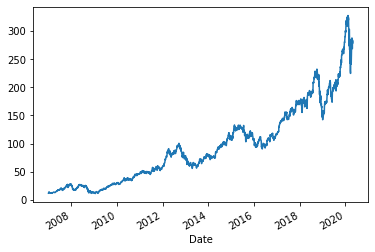

In [160]:
# устанавливаем и импортируем библиотеку для скачивания котровок
!pip install yfinance
import yfinance as yf  
 
# Скачиваем набор котировок компании Apple с 01.01.2007 по 29.04.2020
df = yf.download('AAPL','2007-01-01','2020-04-29')
# отображаем на графике
df.Close.plot()

In [161]:
# ваш изначальный набор данных - ежедневная цена цена закрытия, формат - питоновский список список
data = df.Close.tolist()
# распечатаем пару первых значений
print(data[:5])

# тут просто итерируемся с 1 элемента, т.к 0 не может быть выбросом(исходя из нашего определения выброса)
# и считаем, сколько раз выполнилось условие 
k = 0
for i in range (1, len(data)):
    if abs(data[i] - data[i - 1]) > data[i - 1] * 0.12:
        k +=1
        
print('Всего выбросов', k)
print('Всего дней', len(data))

# ++++++


[11.971428871154785, 12.237142562866211, 12.149999618530273, 12.210000038146973, 13.224286079406738]
Всего выбросов 5
Всего дней 3353


In [162]:
# бонусное задание
# пока что не особо владею pandas, получилось, что получилось
# но хотелось бы увидеть более адекватное решение..
import pandas as pd

data_set = pd.DataFrame(df)

data_set['Emission'] = abs(data_set['Close'] - data_set['Close'].shift()) > data_set['Close'].shift() * 0.12
emissions = data_set[data_set['Emission'] == True]
print('Всего выбросов:', len(emissions))
emissions

Всего выбросов: 5


,Open,High,Low,Close,Adj Close,Volume,Emission
Date,,,,,,,
2008-09-29,17.088572,17.097143,14.370000,15.037143,13.052853,655514300,True
2008-10-13,14.935715,15.790000,14.431429,15.751429,13.672882,384769000,True
2008-11-24,12.172857,13.541429,12.120000,13.278571,11.526342,360564400,True
2013-01-24,65.714287,66.532860,64.321426,64.357140,56.360722,365213100,True
2020-03-16,241.949997,259.079987,240.000000,242.210007,242.210007,80605900,True


In [141]:
emissions.index

DatetimeIndex(['2008-09-29', '2008-10-13', '2008-11-24', '2013-01-24',
               '2020-03-16'],
              dtype='datetime64[ns]', name='Date', freq=None)

# Задание 3

Предположим, что мы наблюдаем за некоторым признаком нашего набора данных, но в данных есть пропуски. Ваша задача реализовать алгоритм заполнения пропущенных значений с помощью средств python.

Изначальный код с инициализацией такого набора данных предоставлен. Реализовать ваше решение можно в блоке 


```
# ваш код тут
```

Бонусное задание: 

Решить с помощью библиотеки Pandas

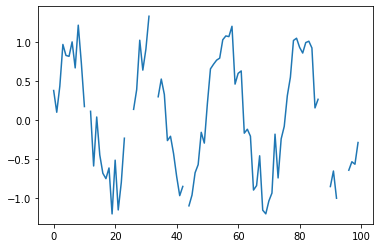

In [163]:
import random
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# переместил tolist, так как иначе оставался numpy nan
a = a.tolist()

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
    
b = deepcopy(a)
plt.plot(b)

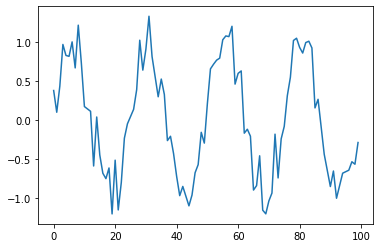

In [164]:
# моя идея в том, чтобы при попадании в none  брать среднее между предыдущим и следующим
# и записывать на позицию, где был none, если следующий тоже none, то вызваем find_next_notNone
# для поиска значения not none и используем это значение
# если none в нулевом элементе, чтобы не выйти за границы списка, заменим на следующий 
# аналогично последний на предыдущий (т. к. они не особо влияют на общий вид данных)

def find_next_notNone(arr, pos):
    res = 0
    for i in range(pos, len(arr)):
        if arr[i] is not None:
            res = a[i]
            break
    return res
            

for i in range(len(a)):
    if a[i] is None:
        if i == 0:
            if a[i + 1] is not None:
                a[i] = a[i + 1]
            else:
                arg = find_next_notNone(a, i + 1)
                a[i] = arg
        elif i == len(a) - 1:
            a[i] = a[i - 1]
        else:
            if a[i + 1] is not None:
                a[i] = (a[i - 1] + a[i + 1]) / 2
            else:
                arg = find_next_notNone(a, i + 1)
                if arg == 0: # если не нашли слудющий не none, просто заменим предыдущим значением
                    arg = a[i - 1]
                a[i] = (a[i - 1] + arg) / 2
                
# отобразим
plt.plot(a)

#+++++++++

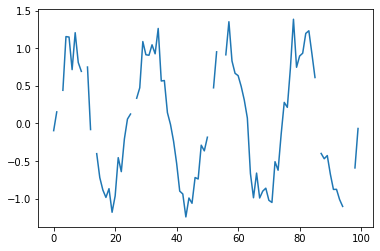

In [165]:
# бонусное задание
import random
import matplotlib.pyplot as plt

# создадим наши данные и добавим к каждой точке синусоиды случайный шум
a = np.linspace(0, 25, 100)
a = np.sin(a) + [random.gauss(0, 0.2) for i in range(len(a))]

# создадим 10 случайных пропусков
for i in range(10):
    a[random.randint(0, len(a) - 1)] = None
# создадим датафрейм
df = pd.DataFrame({'target':a})
# отобразим
plt.plot(df.target.values)

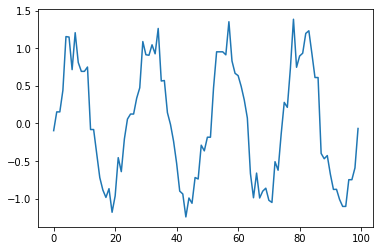

In [166]:
# тут немного не уверен, что правильно, сначала попробовал заполнять таким образом: df.fillna(df.mean())
# т.е по среднему, картинка получилась ужасной относительно той, которая была, как и ожидалось в принципе
# а вот заполнение предыдущими дало неплохой результат

df = df.fillna(method='pad')
plt.plot(df.target.values)

# Задание 4

Важной частью классических алгоритмов машинного обучения является операции с матрицами. Реализуйте код, который перемножит матрицы. (Как это и зачем это нужно делать будет рассмотрено далее в курсе, на текущий момент алгоритм можно найти [тут](https://ru.wikipedia.org/wiki/%D0%A3%D0%BC%D0%BD%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86) )

Бонусное задание:

Решить с помощью библиотеки Numpy.

In [167]:
matrix_A = [[1, 3, -5], [3, 0, 2]]
matrix_B = [[0, -3], [-1, 3], [1, 2]]

# просто перемножение матриц в 3 цикла

def mul(A,B):
    if len(A[0]) != len(B):
        return 'oops'
    else:
        C = []
        for i in range(0,len(A)):
            c_ = []
            for j in range(0,len(B[0])):
                elem = 0
                for k in range(0,len(B)):
                    elem += A[i][k] * B[k][j]
                c_.append(elem)
            C.append(c_)        
        return C

mul(matrix_A, matrix_B)


[[-8, -4], [2, -5]]

In [168]:
# бонусное задание
matrix_A = np.array(matrix_A)
matrix_B = np.array(matrix_B)

np.dot(matrix_A, matrix_B)



array([[-8, -4],
       [ 2, -5]])